In [2]:
from src.dicom_perfusion_loader import DataLoader
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

loader = DataLoader('SRS00013')

# Get the shape of the data
x, y, z, t = loader.get_shape()

def view_slice(z, t):
    # Get the slice data for the given z
    slice_data = loader.get_slice(z)
    
    # Display the image for the given time point t
    plt.figure(figsize=(10, 10))
    plt.imshow(slice_data[t], cmap='gray')
    plt.title(f'Slice {z}/{z}, Time point {t+1}/{t}')
    plt.axis('off')
    plt.show()

# Create interactive widget
interact(
    view_slice,
    z=IntSlider(min=1, max=z, step=1, value=1, description='Slice:'),
    t=IntSlider(min=0, max=t-1, step=1, value=0, description='Time:')
)


interactive(children=(IntSlider(value=1, description='Slice:', max=20, min=1), IntSlider(value=0, description=…

<function __main__.view_slice(z, t)>

In [3]:
# Function to plot intensity-time curve
def plot_intensity_curve(x, y, z):
    concentrations = loader.get_concentration(x, y, z)
    time_points = loader.get_time_points(z)
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, concentrations, '-o')
    plt.title(f'Intensity-Time Curve at (x={x}, y={y}, z={z})')
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration')
    plt.grid(True)
    plt.show()

# Create interactive widget for intensity-time curve
interact(
    plot_intensity_curve,
    x=IntSlider(min=0, max=x-1, step=1, value=x//2, description='X:'),
    y=IntSlider(min=0, max=y-1, step=1, value=y//2, description='Y:'),
    z=IntSlider(min=1, max=z, step=1, value=z//2, description='Slice:')
)

interactive(children=(IntSlider(value=128, description='X:', max=255), IntSlider(value=128, description='Y:', …

<function __main__.plot_intensity_curve(x, y, z)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dicom_perfusion_loader import GVFModel

# Generate sample data
t = np.linspace(0, 100, 100)
A, t0, alpha, beta = 100, 10, 2, 5
y = GVFModel.gamma_variate(t, A, t0, alpha, beta) + np.random.normal(0, 5, 100)

# Ensure no negative values in y (which could cause issues when taking reciprocal)
y = np.maximum(y, 1e-10)

# Create and fit the model
model = GVFModel()
fitted_params = model.fit(t, y)

print("True parameters:", (A, t0, alpha, beta))
print("Fitted parameters:", fitted_params)

# Predict using the fitted model
predicted_y = model.predict(t)

# Calculate metrics
metrics = model.calculate_metrics()
print("\nCalculated metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', label='Original data')
plt.plot(t, predicted_y, '-', label='Fitted GVF')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Gamma Variate Function Fit')
plt.show()

# Test error handling
try:
    model_unfitted = GVFModel()
    model_unfitted.predict(t)
except ValueError as e:
    print("\nCaught expected error:", str(e))

try:
    model_unfitted.calculate_metrics()
except ValueError as e:
    print("Caught expected error:", str(e))

# Print some statistics about the data
print("\nData statistics:")
print(f"Min value: {np.min(y)}")
print(f"Max value: {np.max(y)}")
print(f"Mean value: {np.mean(y)}")
print(f"Number of infinite values: {np.sum(np.isinf(y))}")
print(f"Number of NaN values: {np.sum(np.isnan(y))}")


DEBUG:__main__:Generated data - t shape: (100,), y shape: (100,)
DEBUG:__main__:t range: [0.0, 100.0], y range: [1e-10, 1346.178966243527]
DEBUG:src.dicom_perfusion_loader.gvf_model:Initial t shape: (100,), y shape: (100,)
DEBUG:src.dicom_perfusion_loader.gvf_model:Initial t range: [0.0, 100.0], y range: [1e-10, 1346.178966243527]
DEBUG:src.dicom_perfusion_loader.gvf_model:After removing inf/nan, t shape: (100,), y shape: (100,)
DEBUG:src.dicom_perfusion_loader.gvf_model:After removing inf/nan, t range: [0.0, 100.0], y range: [1e-10, 1346.178966243527]
INFO:src.dicom_perfusion_loader.gvf_model:Fitted parameters: A=101.15999936439631, t0=29.258622900085054, alpha=1.993796570670132, beta=5.007946877204626
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:we

True parameters: (100, 10, 2, 5)
Fitted parameters: [101.15999936  29.2586229    1.99379657   5.00794688]

Calculated metrics:
Time to Peak: 39.243450209953835
Maximum Concentration: 1353.9285518738304
Mean Transit Time: 9.984827309868779
Area Under Curve: 1007.4320022651056


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/juntangwang/Documents/GitHub/MATH-Group/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/juntangwang/Documents/GitHub/MATH-Group/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/juntangwang/Documents/GitHub/MATH-Group/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Use

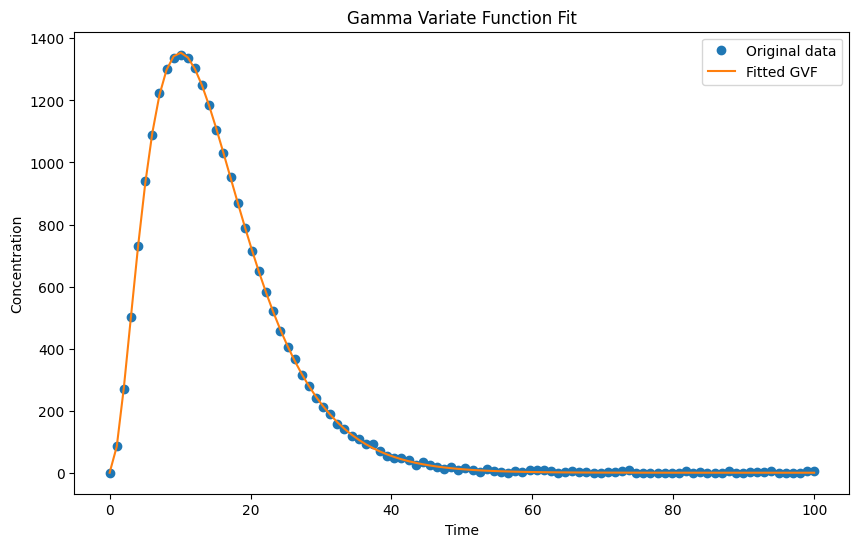


Data statistics:
Min value: 1e-10
Max value: 1346.178966243527
Mean value: 248.52734551989255
Number of infinite values: 0
Number of NaN values: 0

First few values of t:
[0.         1.01010101 2.02020202 3.03030303 4.04040404 5.05050505
 6.06060606 7.07070707 8.08080808 9.09090909]

First few values of y:
[1.00000000e-10 8.51975512e+01 2.69188271e+02 5.03113297e+02
 7.29425089e+02 9.41758684e+02 1.08786461e+03 1.22442973e+03
 1.30194726e+03 1.33671615e+03]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.dicom_perfusion_loader import GVFModel
import logging
import traceback

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

# Generate sample data
t = np.linspace(0, 100, 100)
A, t0, alpha, beta = 100, 10, 2, 5
y = GVFModel.gamma_variate(t, A, t0, alpha, beta) + np.random.normal(0, 5, 100)

# Ensure no negative values in y (which could cause issues when taking reciprocal)
y = np.maximum(y, 1e-10)

logger.debug(f"Generated data - t shape: {t.shape}, y shape: {y.shape}")
logger.debug(f"t range: [{np.min(t)}, {np.max(t)}], y range: [{np.min(y)}, {np.max(y)}]")

# Create and fit the model
model = GVFModel()
try:
    fitted_params = model.fit(t, y)
    print("True parameters:", (A, t0, alpha, beta))
    print("Fitted parameters:", fitted_params)

    # Predict using the fitted model
    predicted_y = model.predict(t)

    # Calculate metrics
    metrics = model.calculate_metrics()
    print("\nCalculated metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, 'o', label='Original data')
    plt.plot(t, predicted_y, '-', label='Fitted GVF')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend()
    plt.title('Gamma Variate Function Fit')
    plt.show()

except Exception as e:
    logger.error(f"An error occurred: {str(e)}")
    logger.error(traceback.format_exc())

# Print some statistics about the data
print("\nData statistics:")
print(f"Min value: {np.min(y)}")
print(f"Max value: {np.max(y)}")
print(f"Mean value: {np.mean(y)}")
print(f"Number of infinite values: {np.sum(np.isinf(y))}")
print(f"Number of NaN values: {np.sum(np.isnan(y))}")/

# Additional debugging: print out the first few values of t and y
print("\nFirst few values of t:")
print(t[:10])
print("\nFirst few values of y:")
print(y[:10])


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from src.dicom_perfusion_loader import DataLoader, GVFModel
import logging
from tqdm import tqdm
import time

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Set the logging level for all loggers to WARNING
for name in logging.root.manager.loggerDict:
    logging.getLogger(name).setLevel(logging.WARNING)

# Initialize the DataLoader with your DICOM folder path
loader = DataLoader('SRS00013')

# Get the shape of the data
x, y, z, t = loader.get_shape()
logger.info(f"Data shape: {x}x{y}x{z}x{t}")

# Initialize the GVF model
gvf_model = GVFModel()

# Create an empty 3D array to store MTT values
mtt_map = np.zeros((z, y, x))

# Option to process a subset of slices for testing
start_slice = 0
end_slice = z  # Change this to a smaller number for testing, e.g., 5

# Iterate through each voxel
start_time = time.time()
error_count = 0
for z_idx in tqdm(range(start_slice, end_slice), desc="Processing slices"):
    for y_idx in range(y):
        for x_idx in range(x):
            try:
                concentrations = np.array(loader.get_concentration(x_idx, y_idx, z_idx + 1))
                time_points = np.array(loader.get_time_points(z_idx + 1))
                
                if len(concentrations) < 4 or len(time_points) < 4:
                    raise ValueError("Not enough valid data points")
                
                gvf_model.fit(time_points, concentrations)
                metrics = gvf_model.calculate_metrics()
                mtt_map[z_idx, y_idx, x_idx] = metrics["Mean Transit Time"]
            except Exception:
                error_count += 1
                mtt_map[z_idx, y_idx, x_idx] = np.nan

end_time = time.time()
logger.info(f"Total processing time: {end_time - start_time:.2f} seconds")
logger.info(f"Total errors encountered: {error_count}")

def display_mtt_slice(z_idx):
    plt.figure(figsize=(10, 8))
    plt.imshow(mtt_map[z_idx], cmap='hot', interpolation='nearest')
    plt.colorbar(label='Mean Transit Time (s)')
    plt.title(f'MTT Heat Map - Slice {z_idx + 1}')
    plt.axis('off')
    plt.show()

# Display MTT heat maps for a few slices
for z_idx in [start_slice, (start_slice + end_slice) // 2, end_slice - 1]:
    display_mtt_slice(z_idx)

# Save the MTT map as a NumPy array for future use
np.save('mtt_map.npy', mtt_map)

logger.info("MTT heat map generation complete.")

# Print statistics about the MTT map
valid_mtts = mtt_map[~np.isnan(mtt_map)]
logger.info(f"MTT statistics:")
logger.info(f"  Min MTT: {np.min(valid_mtts):.2f} s")
logger.info(f"  Max MTT: {np.max(valid_mtts):.2f} s")
logger.info(f"  Mean MTT: {np.mean(valid_mtts):.2f} s")
logger.info(f"  Median MTT: {np.median(valid_mtts):.2f} s")
logger.info(f"  Percentage of valid voxels: {100 * len(valid_mtts) / mtt_map.size:.2f}%")


Processing slices:   0%|          | 0/20 [00:00<?, ?it/s]ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_model:Curve fitting failed: Optimal parameters not found: The maximum number of function evaluations is exceeded.
ERROR:src.dicom_perfusion_loader.gvf_